In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
from tensorflow.keras.preprocessing import image

In [2]:
#loading the data set
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [3]:
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [4]:
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0 
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

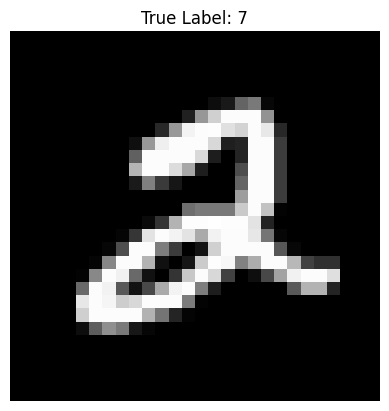

In [5]:
#shows the image at that index
import matplotlib.pyplot as plt
plt.imshow(x_train[5].reshape(28, 28), cmap='gray')
plt.title(f"True Label: {y_test[0]}")
plt.axis('off')
plt.show()


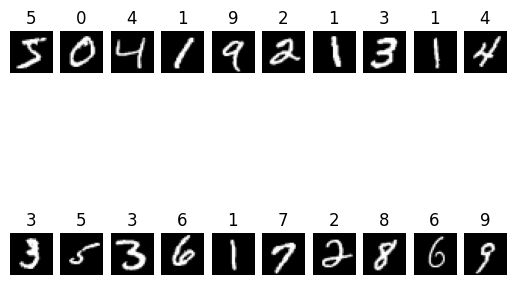

In [6]:
#training data pics
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"{y_train[i]}")
    plt.axis('off')

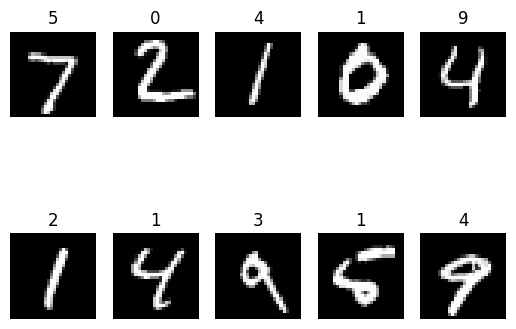

In [7]:
#testing data pics
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"{y_train[i]}")
    plt.axis('off')

In [8]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9079 - loss: 0.2966 - val_accuracy: 0.9849 - val_loss: 0.0499
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9621 - loss: 0.1279 - val_accuracy: 0.9874 - val_loss: 0.0377
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9714 - loss: 0.0953 - val_accuracy: 0.9867 - val_loss: 0.0365
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9763 - loss: 0.0782 - val_accuracy: 0.9898 - val_loss: 0.0321
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9802 - loss: 0.0662 - val_accuracy: 0.9905 - val_loss: 0.0292
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9815 - loss: 0.0597 - val_accuracy: 0.9910 - val_loss: 0.0291
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9837 - loss: 0.0533 - val_accuracy: 0.9911 - val_loss: 0.0330
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9852 - loss: 0

In [11]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9937 - loss: 0.0248


[0.024831514805555344, 0.9937000274658203]

testing data set

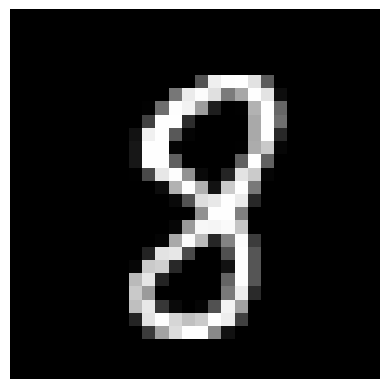

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
8
True label: 8
Predicted class: 8


In [17]:
# Pick a sample image from test set 
sample_index = 563
img = x_test[sample_index] 
true_label = y_test[sample_index]
# Show the image 
plt.imshow(img.reshape(28,28), cmap='gray') 
plt.axis('off') 
plt.show()
# Predict on testing data
img = np.expand_dims(img, axis=0)          
predictions = model.predict(img) 
predicted_class = np.argmax(predictions[0])
print(predicted_class)
print("True label:", true_label) 
print("Predicted class:", predicted_class)

In [16]:
from sklearn.metrics import classification_report,accuracy_score

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))
print(accuracy_score(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

0.9937
